# Predicting the Winner of Super Bowl LVI (2022)

## Recap Of Data Science Problem

The purpose of this data science project is to come up with a prediction model for the winner of Super Bowl LVI. Using historical statistics of NFL teams for a business case, I can use a dataset to understand the winner and other features related to winning while also help others make future predictions in a more reliable way than just using the historical statistics or guessing. 

Having the ability to predict the NFL champion team in advance or accurately can be a financial game changer and very lucrative. Developing a robust model to predict the winner can highlight the most important factors that make a particular football team successful and therefore profitable. It may help teams in devising better game plans and improving recruitment strategy. 

Using historical stats of teams for a business case, we can use a dataset to understand the most important factors related to winning the ‘Super Bowl’. There is a gap between guessing and knowing what it truly takes for a NFL time to make it to the Super Bowl in the eyes of the public. There can be many use cases for this type of prediction especially for an audience of either the public, football enthusiasts, investors, or just anyone who is looking to understand the fundamentals of the sport better. In particular, which teams are most likely to make it based on the most recent games. 

This project aims to build a predictive model for NFL teams based on a number of features or properties, industry standard statistics, and knowledge. This model will be used to provide guidance for winners and future value investment plans for the Super Bowl. 

## Data Wrangling

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import math

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings(action='ignore')

## Objectives

There are fundamental questions that should align with objectives for the dataset before moving on.
* Do I have the data I need to tackle the data science problem?
    * Have I identified the required target value?
* Do I have potentially useful features?
* Do I have any fundamental issues with the data?

## Load Team Stats Dataset

Loading is the first step with the data but joining is not needed as I am only working with one dataset.

In [2]:
raw_data = "../data/raw/nfl_team_stats_2002-2021.csv"
team_stats = pd.read_csv(raw_data)

# Checking shape for verification (should have 39 features)
team_stats.shape

(5357, 39)

In [3]:
#Call the info method on team_stats to see a summary of the data
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5357 non-null   object
 1   away                   5357 non-null   object
 2   home                   5357 non-null   object
 3   first_downs_away       5357 non-null   int64 
 4   first_downs_home       5357 non-null   int64 
 5   third_downs_away       5357 non-null   object
 6   third_downs_home       5357 non-null   object
 7   fourth_downs_away      5357 non-null   object
 8   fourth_downs_home      5357 non-null   object
 9   passing_yards_away     5357 non-null   int64 
 10  passing_yards_home     5357 non-null   int64 
 11  rushing_yards_away     5357 non-null   int64 
 12  rushing_yards_home     5357 non-null   int64 
 13  total_yards_away       5357 non-null   int64 
 14  total_yards_home       5357 non-null   int64 
 15  comp_att_away        

"score_away" and 'score_home' are potential targets for the data. The end score of the winner for each observation is what can be modeled. The other columns are potential features. The data also shows that most column types are objects and integer types. Most stats are actually a group of home and away pairs for inclusion of both teams.

Things we need to explore are the following:

* Column names
* Data types
* Description of the columns
* Counts unique values
* Ranges of values

### Check for missing values

In [4]:
team_stats.isnull().sum()

date                     0
away                     0
home                     0
first_downs_away         0
first_downs_home         0
third_downs_away         0
third_downs_home         0
fourth_downs_away        0
fourth_downs_home        0
passing_yards_away       0
passing_yards_home       0
rushing_yards_away       0
rushing_yards_home       0
total_yards_away         0
total_yards_home         0
comp_att_away            0
comp_att_home            0
sacks_away               0
sacks_home               0
rushing_attempts_away    0
rushing_attempts_home    0
fumbles_away             0
fumbles_home             0
int_away                 0
int_home                 0
turnovers_away           0
turnovers_home           0
penalties_away           0
penalties_home           0
redzone_away             0
redzone_home             0
drives_away              0
drives_home              0
def_st_td_away           0
def_st_td_home           0
possession_away          0
possession_home          0
s

### Column names

So the first thing we want to do is take a look at the actual data and column names. 

In [5]:
#Call the head method on team_stats to print the first several rows of the data
team_stats.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,...,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,...,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,...,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,...,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,...,0-10,0-10,20,17,0,0,30:16,29:44,40,39


The column names also correspond to what those columns store very well. However, they can be improved.

In [6]:
# View columns
original_cols = team_stats.columns.values
original_cols

array(['date', 'away', 'home', 'first_downs_away', 'first_downs_home',
       'third_downs_away', 'third_downs_home', 'fourth_downs_away',
       'fourth_downs_home', 'passing_yards_away', 'passing_yards_home',
       'rushing_yards_away', 'rushing_yards_home', 'total_yards_away',
       'total_yards_home', 'comp_att_away', 'comp_att_home', 'sacks_away',
       'sacks_home', 'rushing_attempts_away', 'rushing_attempts_home',
       'fumbles_away', 'fumbles_home', 'int_away', 'int_home',
       'turnovers_away', 'turnovers_home', 'penalties_away',
       'penalties_home', 'redzone_away', 'redzone_home', 'drives_away',
       'drives_home', 'def_st_td_away', 'def_st_td_home',
       'possession_away', 'possession_home', 'score_away', 'score_home'],
      dtype=object)

### Basic Model Dataframe

This is where we can either divide the data into a dataframe made for a basic model or a more advanced/robust model.

In [7]:
all_cols = ['first_downs_away', 'first_downs_home',
       'third_downs_away', 'third_downs_home', 'fourth_downs_away',
       'fourth_downs_home', 'passing_yards_away', 'passing_yards_home',
       'rushing_yards_away', 'rushing_yards_home', 'total_yards_away',
       'total_yards_home', 'comp_att_away', 'comp_att_home', 'sacks_away',
       'sacks_home', 'rushing_attempts_away', 'rushing_attempts_home',
       'fumbles_away', 'fumbles_home', 'int_away', 'int_home',
       'turnovers_away', 'turnovers_home', 'penalties_away',
       'penalties_home', 'redzone_away', 'redzone_home', 'drives_away',
       'drives_home', 'def_st_td_away', 'def_st_td_home',
       'possession_away', 'possession_home']

basic_cols = ['date', 'away', 'home', 'score_away', 'score_home']

team_stats_basic = team_stats[basic_cols]
team_stats_basic.head()

,date,away,home,score_away,score_home
0,2002-09-05,49ers,Giants,16,13
1,2002-09-08,Jets,Bills,37,31
2,2002-09-08,Vikings,Bears,23,27
3,2002-09-08,Chargers,Bengals,34,6
4,2002-09-08,Chiefs,Browns,40,39


In [8]:
#Viewing info of df to verify data types
team_stats_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        5357 non-null   object
 1   away        5357 non-null   object
 2   home        5357 non-null   object
 3   score_away  5357 non-null   int64 
 4   score_home  5357 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 209.4+ KB


In [9]:
# convert date column to datetime
team_stats_basic['date'] = pd.to_datetime(team_stats_basic['date'])
team_stats_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        5357 non-null   datetime64[ns]
 1   away        5357 non-null   object        
 2   home        5357 non-null   object        
 3   score_away  5357 non-null   int64         
 4   score_home  5357 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 209.4+ KB


As we can now see the dataset is much tidyier and digestible

### Advanced Model Dataframe

In [10]:
# add original cols for more robustness
team_stats_adv = team_stats[original_cols]
team_stats_adv.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,...,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,...,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,...,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,...,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,...,0-10,0-10,20,17,0,0,30:16,29:44,40,39


Now we can see that all columns are included and a robust model can be built.

In [11]:
# convert date column to datetime again
team_stats_adv['date'] = pd.to_datetime(team_stats_adv['date'])
team_stats_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   5357 non-null   datetime64[ns]
 1   away                   5357 non-null   object        
 2   home                   5357 non-null   object        
 3   first_downs_away       5357 non-null   int64         
 4   first_downs_home       5357 non-null   int64         
 5   third_downs_away       5357 non-null   object        
 6   third_downs_home       5357 non-null   object        
 7   fourth_downs_away      5357 non-null   object        
 8   fourth_downs_home      5357 non-null   object        
 9   passing_yards_away     5357 non-null   int64         
 10  passing_yards_home     5357 non-null   int64         
 11  rushing_yards_away     5357 non-null   int64         
 12  rushing_yards_home     5357 non-null   int64         
 13  tot

In [12]:
# Review data statistics
team_stats_adv.describe()

,first_downs_away,first_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,rushing_attempts_away,rushing_attempts_home,...,int_away,int_home,turnovers_away,turnovers_home,drives_away,drives_home,def_st_td_away,def_st_td_home,score_away,score_home
count,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,...,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000
mean,19.026134,19.948105,221.804555,227.566922,110.445399,117.732873,332.249953,345.299795,26.603136,27.669778,...,0.954825,0.900691,1.592122,1.536308,12.275714,12.211126,0.327982,0.344969,21.148217,23.416464
std,5.085166,4.991284,79.214403,77.920508,50.753058,52.052181,86.603858,83.863821,7.879202,7.827500,...,1.020063,1.001788,1.332914,1.324370,2.607358,2.510777,0.785979,0.808665,10.109726,10.323772
min,3.000000,3.000000,-7.000000,6.000000,-18.000000,-3.000000,26.000000,77.000000,6.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,17.000000,165.000000,173.000000,74.000000,81.000000,273.000000,288.000000,21.000000,22.000000,...,0.000000,0.000000,1.000000,1.000000,11.000000,11.000000,0.000000,0.000000,14.000000,16.000000
50%,19.000000,20.000000,219.000000,223.000000,103.000000,111.000000,332.000000,344.000000,26.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,12.000000,12.000000,0.000000,0.000000,21.000000,23.000000
75%,22.000000,23.000000,275.000000,278.000000,139.000000,148.000000,391.000000,401.000000,32.000000,33.000000,...,2.000000,1.000000,2.000000,2.000000,14.000000,13.000000,0.000000,0.000000,28.000000,30.000000
max,37.000000,40.000000,516.000000,522.000000,404.000000,378.000000,643.000000,653.000000,57.000000,60.000000,...,6.000000,6.000000,8.000000,7.000000,26.000000,25.000000,6.000000,6.000000,59.000000,62.000000


**Some interesting observations after reviewing the statistics for the dataframe:**

* Both the max score away and the max score at home were relatively close with a point difference of 3.
* Interceptions at home and away are exactly the same maximum.
* Some statistics, like the minimum, passing and rushing yards can be negative.
* On average, teams at home scored at least 2 more points then teams away, this makes sense.
* Home teams scored an average of 23 points per game at home, with lowest score of '0' and highest score of '62'.
* Away teams scored an average of 21 points per game at home, with lowest score of '0' and highest score of '59'.

## Exploratory Data Anaylsis

In [13]:
# Analyze average statistics of each team at home
home_stats_mean = team_stats_adv.groupby(by='home', axis=0).mean()
home_stats_mean

,first_downs_away,first_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,rushing_attempts_away,rushing_attempts_home,...,int_away,int_home,turnovers_away,turnovers_home,drives_away,drives_home,def_st_td_away,def_st_td_home,score_away,score_home
home,,,,,,,,,,,,,,,,,,,,,
49ers,18.736527,18.706587,220.161677,207.419162,104.173653,126.041916,324.335329,333.461078,26.736527,28.257485,...,0.958084,0.856287,1.568862,1.580838,12.502994,12.556886,0.257485,0.275449,20.904192,22.568862
Bears,18.598802,18.425150,217.922156,204.802395,107.958084,109.922156,325.880240,314.724551,26.544910,27.299401,...,1.053892,1.113772,1.730539,1.730539,12.520958,12.724551,0.317365,0.425150,20.257485,21.856287
Bengals,19.413174,19.538922,224.491018,220.275449,120.125749,116.544910,344.616766,336.820359,27.000000,28.041916,...,1.071856,0.940120,1.592814,1.538922,12.137725,12.257485,0.347305,0.299401,22.467066,22.586826
Bills,18.743902,18.957317,196.060976,197.817073,123.262195,129.853659,319.323171,327.670732,28.189024,29.292683,...,1.085366,0.823171,1.725610,1.506098,12.341463,12.335366,0.256098,0.371951,20.390244,22.396341
Broncos,18.418605,20.883721,218.651163,236.569767,106.790698,126.319767,325.441860,362.889535,25.854651,28.755814,...,0.767442,0.831395,1.337209,1.546512,12.203488,12.174419,0.389535,0.325581,20.941860,23.877907
Browns,19.621118,17.975155,214.372671,201.329193,125.571429,109.099379,339.944099,310.428571,29.701863,26.751553,...,0.925466,1.124224,1.490683,1.720497,12.211180,12.223602,0.372671,0.260870,21.403727,18.422360
Buccaneers,18.574850,19.191617,219.568862,226.856287,105.856287,107.179641,325.425150,334.035928,26.772455,26.029940,...,1.095808,1.065868,1.748503,1.682635,12.317365,12.113772,0.401198,0.401198,21.161677,21.706587
Cardinals,19.145455,19.745455,226.963636,240.557576,110.139394,97.472727,337.103030,338.030303,26.581818,25.230303,...,0.921212,1.090909,1.636364,1.727273,12.442424,12.472727,0.454545,0.509091,21.909091,22.551515
Chargers,18.674699,21.391566,220.006024,246.867470,105.963855,117.843373,325.969880,364.710843,25.656627,27.704819,...,0.993976,0.879518,1.548193,1.451807,11.855422,11.855422,0.361446,0.385542,21.054217,25.578313


In [14]:
# Analyze average statistics of each team away
away_stats_mean = team_stats_adv.groupby(by='away', axis=0).mean()
away_stats_mean

,first_downs_away,first_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,rushing_attempts_away,rushing_attempts_home,...,int_away,int_home,turnovers_away,turnovers_home,drives_away,drives_home,def_st_td_away,def_st_td_home,score_away,score_home
away,,,,,,,,,,,,,,,,,,,,,
49ers,17.664706,20.035294,197.535294,230.523529,117.694118,113.611765,315.229412,344.135294,27.217647,28.458824,...,0.894118,0.794118,1.570588,1.441176,12.382353,12.311765,0.282353,0.300000,19.788235,24.094118
Bears,17.481481,19.308642,196.234568,223.308642,105.475309,116.993827,301.709877,340.302469,26.234568,27.672840,...,1.043210,0.919753,1.771605,1.691358,12.654321,12.555556,0.500000,0.351852,19.339506,22.709877
Bengals,18.830303,19.981818,222.078788,228.066667,98.957576,118.509091,321.036364,346.575758,26.060606,28.139394,...,0.963636,0.909091,1.593939,1.545455,12.381818,12.254545,0.303030,0.393939,20.581818,22.690909
Bills,17.993902,20.408537,202.347561,212.451220,110.024390,129.079268,312.371951,341.530488,26.207317,29.128049,...,1.060976,0.920732,1.719512,1.493902,12.219512,12.286585,0.359756,0.347561,19.890244,23.390244
Broncos,19.656442,19.122699,226.196319,215.484663,119.932515,115.723926,346.128834,331.208589,28.110429,27.687117,...,1.055215,0.858896,1.662577,1.552147,12.570552,12.552147,0.368098,0.319018,21.687117,23.245399
Browns,17.607362,21.049080,204.730061,226.196319,107.693252,136.392638,312.423313,362.588957,25.116564,30.368098,...,1.110429,0.926380,1.840491,1.472393,12.263804,12.190184,0.196319,0.361963,18.282209,24.932515
Buccaneers,19.134146,19.713415,243.451220,225.146341,99.390244,114.170732,342.841463,339.317073,25.432927,27.408537,...,1.024390,1.018293,1.731707,1.762195,12.201220,12.201220,0.439024,0.365854,21.524390,23.170732
Cardinals,18.379518,20.259036,217.578313,226.180723,96.885542,121.602410,314.463855,347.783133,24.692771,28.397590,...,1.144578,0.975904,1.891566,1.662651,12.771084,12.536145,0.307229,0.391566,19.993976,25.355422
Chargers,20.119760,20.263473,245.035928,230.041916,106.281437,116.185629,351.317365,346.227545,26.910180,26.814371,...,0.892216,0.874251,1.455090,1.467066,11.808383,11.904192,0.293413,0.269461,23.718563,23.023952


**Teamwise statistics at home and away show a clear trend among the teams that ended up getting the highest score:**

* Teams at home scored more points overall, approximately over 25%.
* Teams away scored less points overall, approximately less than 25%.

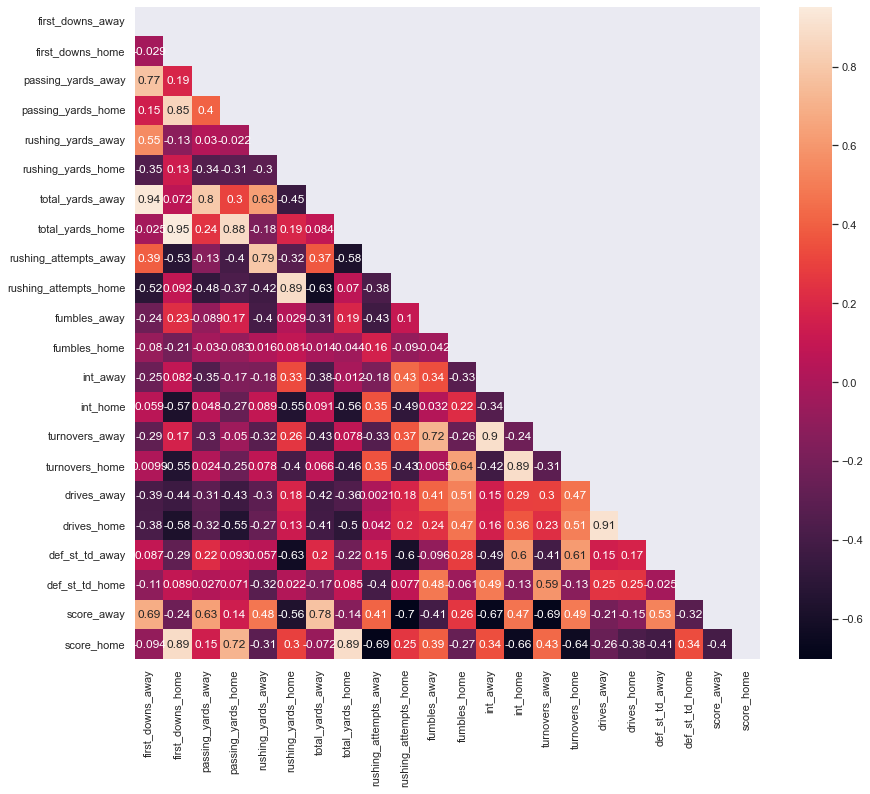

In [15]:
# Analyze correlation between home team scores and other features
plt.figure(figsize=(14,12))
corr = home_stats_mean.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.show();

A home team's score has significant correlation with the following features in decreasing order:

1. first_downs_home
1. total_yards_home
1. passing_yards_home
1. turnovers_away
1. fumbles_away

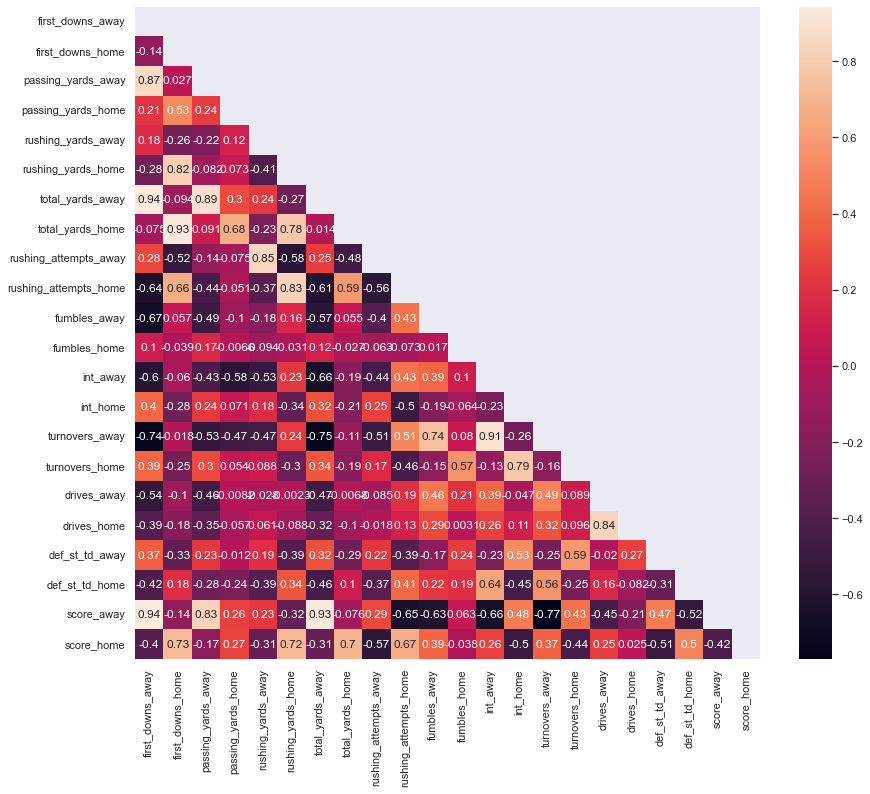

In [16]:
# Analyze correlation between away team scores and other features
plt.figure(figsize=(14,12))
corr = away_stats_mean.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.show();

An away team's score has significant correlation with the following features in decreasing order:

1. *First_downs_home*
1. *Rushing_yards_home*
1. *Total_yards_home*
1. *Rushing_attempts_home*
1. *Fumbles_away*

In [17]:
col_list = [
    'first_downs_away', 'first_downs_home','rushing_yards_away', 'rushing_yards_home', 
    'total_yards_away','total_yards_home', 'rushing_attempts_away', 'rushing_attempts_home',
    'fumbles_away', 'fumbles_home'
]

In [18]:
LAR = team_stats[team_stats.home == 'Rams'].iloc[:-1,:]
LAR

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
25,2002-09-15,Giants,Rams,16,18,6-15,3-9,0-0,0-1,291,...,0-5,0-8,16,18,2,0,35:01,24:59,26,21
50,2002-09-29,Cowboys,Rams,17,19,5-15,5-13,0-0,0-0,193,...,0-3,0-3,14,12,0,0,31:57,28:03,13,10
84,2002-10-13,Raiders,Rams,20,19,3-11,4-11,0-2,0-0,302,...,0-6,0-6,17,16,0,0,28:14,31:46,13,28
91,2002-10-20,Seahawks,Rams,13,28,2-11,8-16,0-1,0-0,240,...,0-6,0-6,21,17,2,0,19:33,40:27,20,37
132,2002-11-10,Chargers,Rams,15,25,3-10,4-9,1-1,0-0,130,...,0-5,0-5,15,16,4,0,29:47,30:13,24,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,2021-11-07,Titans,Rams,16,22,4-12,4-15,2-2,2-3,125,...,3-3,1-3,11,11,1,0,27:39,32:21,28,16
5261,2021-12-05,Jaguars,Rams,14,24,5-12,5-12,1-2,1-1,136,...,1-1,3-4,11,10,0,0,26:15,33:45,7,37
5294,2021-12-21,Seahawks,Rams,13,20,3-11,6-12,0-1,0-1,134,...,1-2,1-2,10,11,0,0,24:54,35:06,10,20
5339,2022-01-09,49ers,Rams,23,19,9-14,10-17,0-0,1-1,314,...,2-4,3-4,11,11,0,0,36:44,31:24,27,24


In [19]:
LAR.set_index('date', drop=True, inplace=True)

In [20]:
def plot_features(data, col_list):
    
    fig, axs = plt.subplots(3, 2, figsize=(12,16))
    
    for feature, ax in zip(col_list, axs.ravel()):
        data[feature].plot(ax=ax)
        ax.set_title(feature)
        ax.set_xlabel('date')
        ax.set_xticks(np.arange(0,22,2))
    
    plt.show()

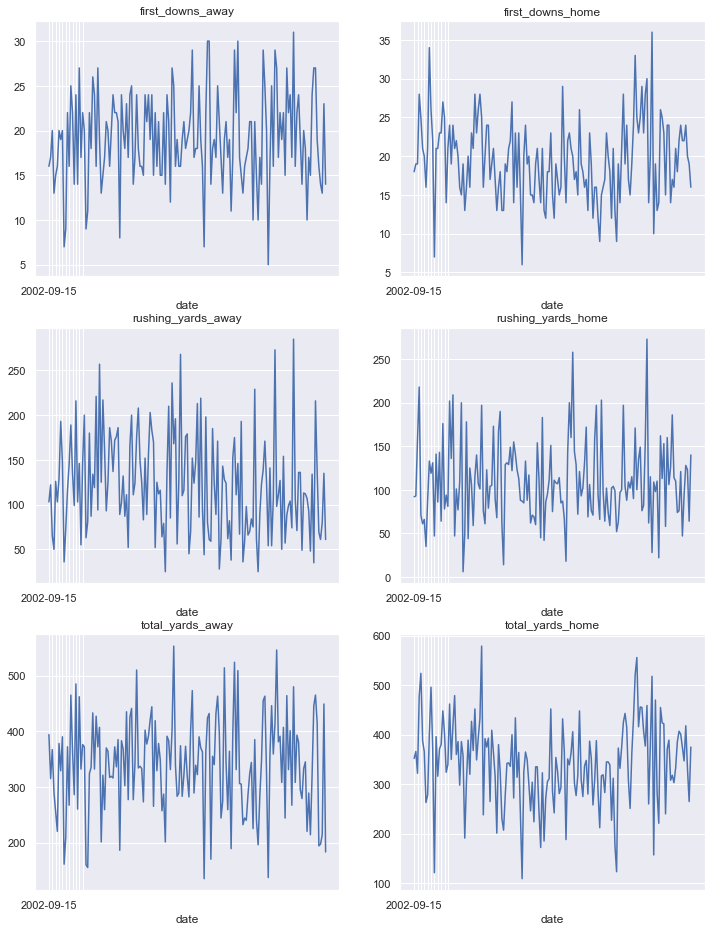

In [21]:
plot_features(LAR, col_list)

In [22]:
# Run augmented Dickey-Fuller test to check data stationarity

for feature in col_list:
    results = adfuller(LAR[feature])
    print(f'The p-value for {feature} feature is : {round(results[1],3)}')

The p-value for first_downs_away feature is : 0.0
The p-value for first_downs_home feature is : 0.0
The p-value for rushing_yards_away feature is : 0.0
The p-value for rushing_yards_home feature is : 0.0
The p-value for total_yards_away feature is : 0.0
The p-value for total_yards_home feature is : 0.0
The p-value for rushing_attempts_away feature is : 0.0
The p-value for rushing_attempts_home feature is : 0.0
The p-value for fumbles_away feature is : 0.0
The p-value for fumbles_home feature is : 0.0


In [23]:
# Calculate the 'difference' within a series values to induce stationarity

# 1st_downs

LAR_1st_downs_diff = LAR['first_downs_home'].diff().dropna()
results = adfuller(LAR_1st_downs_diff)
print(f'p-value:{round(results[1],3)}')

p-value:0.0


In [24]:
# 'Opp_Total_yards'

LAR_Opp_Total_yards_diff = LAR['total_yards_away'].diff().dropna()
results = adfuller(LAR_Opp_Total_yards_diff)
print(f'p-value:{round(results[1],3)}')

p-value:0.0


In [25]:
# Convert the remaining features of LAR into pandas series

LAR_Total_yards = LAR['total_yards_home']
LAR_Rushing_yards = LAR['rushing_yards_home']
LAR_Opp_1st_downs = LAR['first_downs_away']
LAR_Opp_Rushing_yards = LAR['rushing_yards_away']

In [26]:
# Plot autocorrelation and partial autocorrelation functions

def plot_corr_func(series):
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,8))
    
    plot_acf(series, lags=7, zero=False, ax=ax1)
    
    plot_pacf(series, lags=7, zero=False, ax=ax2)

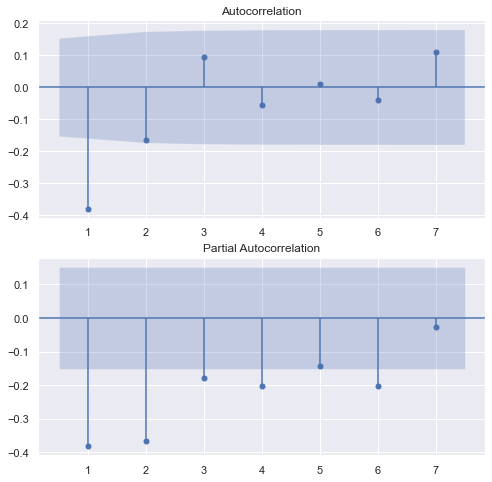

In [27]:
# Plot ACF and PACF for LAR 1st_down

plot_corr_func(LAR_1st_downs_diff)

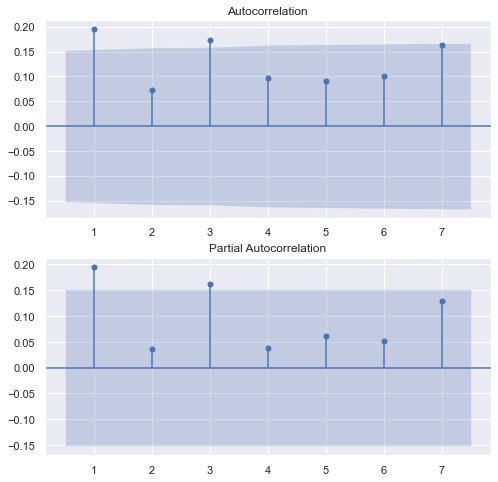

In [28]:
# Plot ACF and PACF for LAR Total_yards

plot_corr_func(LAR_Total_yards)

In [29]:
# Check performance of Cincinnati Bengals over the season

CIN = team_stats[team_stats.away == 'Bengals'].iloc[:-1,:]
CIN

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
17,2002-09-15,Bengals,Browns,28,15,9-17,4-12,0-2,0-1,201,...,0-3,0-2,15,11,0,0,31:18,28:42,7,20
44,2002-09-22,Bengals,Falcons,11,18,5-16,5-14,0-4,1-1,125,...,0-4,0-3,18,11,0,0,23:15,36:45,3,30
64,2002-10-06,Bengals,Colts,23,19,2-11,6-14,2-3,0-0,237,...,0-6,0-7,16,15,0,0,30:45,29:15,21,28
123,2002-11-03,Bengals,Texans,25,22,6-10,5-13,0-0,0-0,263,...,0-5,0-7,11,16,2,0,31:22,28:38,38,3
137,2002-11-10,Bengals,Ravens,20,21,7-16,4-10,0-0,1-1,249,...,0-6,0-6,19,19,1,3,32:35,27:25,27,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,2021-10-31,Bengals,Jets,18,32,4-10,6-11,0-1,0-0,277,...,4-6,4-6,12,12,0,0,23:39,36:21,31,34
5232,2021-11-21,Bengals,Raiders,23,13,8-16,1-7,0-0,0-0,129,...,2-2,1-3,10,11,0,0,37:20,22:40,32,13
5288,2021-12-19,Bengals,Broncos,12,19,4-13,7-16,0-0,0-1,136,...,0-2,0-1,12,11,0,0,27:19,32:41,15,10
5330,2022-01-09,Bengals,Browns,11,24,5-14,6-12,1-1,0-1,103,...,1-2,2-4,9,11,1,0,26:21,33:39,16,21


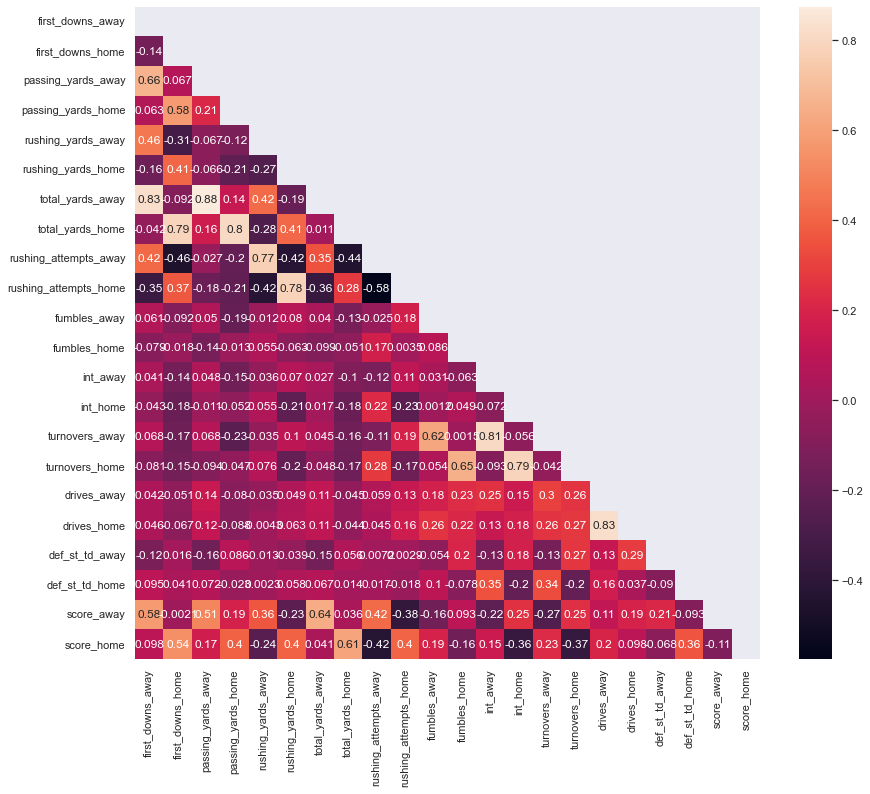

In [30]:
# Analyze correlation between teams' score and other features

plt.figure(figsize=(14,12))
corr = CIN.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.show();

In [31]:
# Set 'Week' column as the index for time-series analysis

CIN.set_index('date', drop=True, inplace=True)

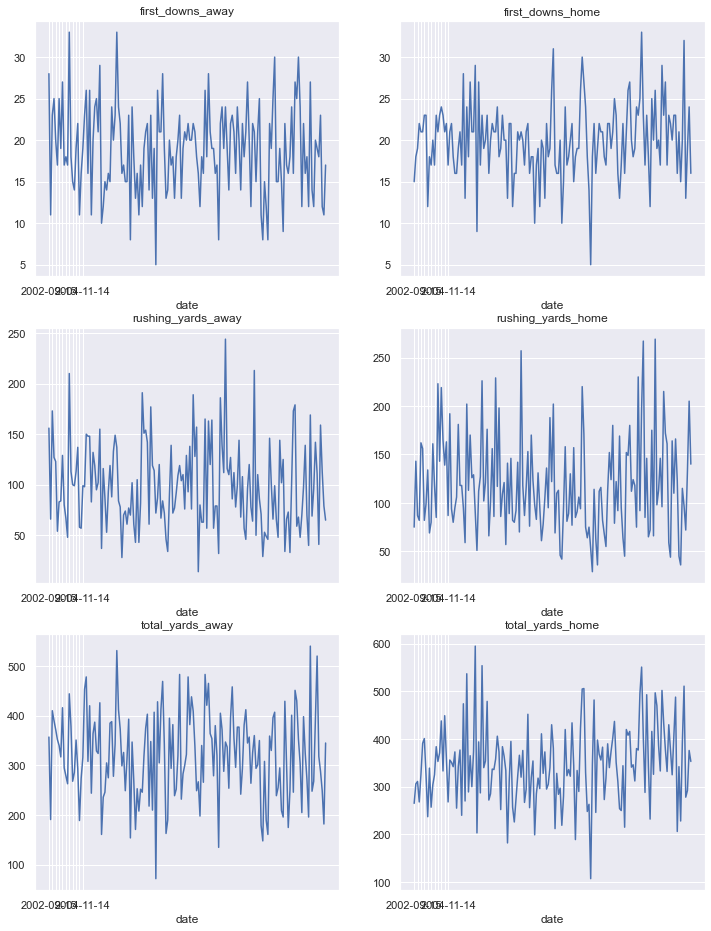

In [32]:
# Plot selected feature for CIN

plot_features(CIN, col_list)


In [33]:
 # Run augmented Dickey-Fuller test to check stationarity

for feature in col_list:
    results = adfuller(CIN[feature])
    print(f'The p-value for {feature} feature is : {round(results[1],3)}')

The p-value for first_downs_away feature is : 0.0
The p-value for first_downs_home feature is : 0.0
The p-value for rushing_yards_away feature is : 0.0
The p-value for rushing_yards_home feature is : 0.0
The p-value for total_yards_away feature is : 0.0
The p-value for total_yards_home feature is : 0.0
The p-value for rushing_attempts_away feature is : 0.0
The p-value for rushing_attempts_home feature is : 0.0
The p-value for fumbles_away feature is : 0.0
The p-value for fumbles_home feature is : 0.0


In [34]:
# Calculate the 'difference' within a series values to induce stationarity

# Total_yards

CIN_Total_yards_diff = CIN['total_yards_away'].diff().diff().diff().dropna()
results = adfuller(CIN_Total_yards_diff)
print(f'p-value:{round(results[1],3)}')

p-value:0.0


In [35]:
# Opp_Total_yards

CIN_Opp_Total_yards_diff = CIN['total_yards_home'].diff().diff().dropna()
results = adfuller(CIN_Opp_Total_yards_diff)
print(f'p-value:{round(results[1],3)}')

p-value:0.0


In [36]:
# Opp_Rushing_yards

CIN_Opp_Rushing_yards_diff = CIN['rushing_yards_home'].diff().diff().dropna()
results = adfuller(CIN_Opp_Rushing_yards_diff)
print(f'p-value:{round(results[1],3)}')

p-value:0.0


In [37]:
# Convert the remaining features of CIN into pandas series

CIN_1st_downs = CIN['first_downs_home']
CIN_Rushing_yards = CIN['rushing_yards_home']
CIN_Opp_1st_downs = CIN['first_downs_away']

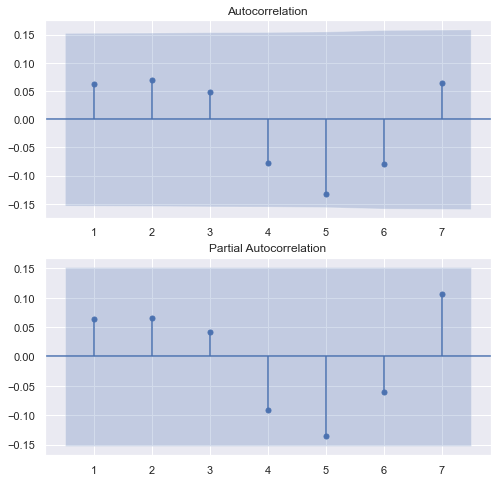

In [38]:
# Plot ACF and PACF for CIN 1st_downs

plot_corr_func(CIN_1st_downs)

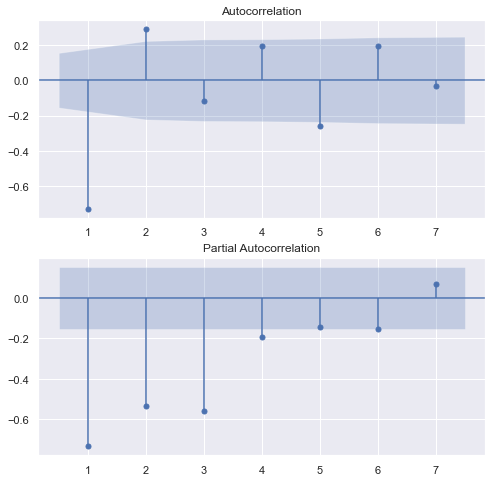

In [39]:
# Plot ACF and PACF for CIN Total_yards

plot_corr_func(CIN_Total_yards_diff)

In [40]:
# Change the data frame index to a time-dependent feature ('Week')

team_stats_weekly = team_stats[team_stats.date != 22].set_index('date',drop=True)
team_stats_weekly_grouped = team_stats_weekly.groupby(by='date').mean()

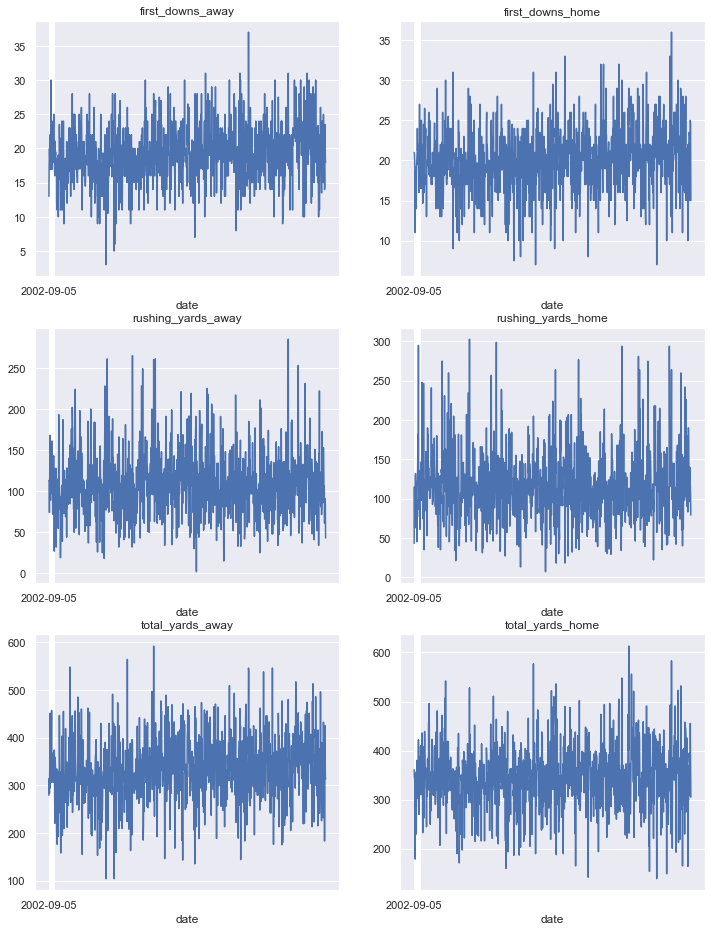

In [41]:
# Plot selected feature for team_stats_weekly

plot_features(team_stats_weekly_grouped, col_list)

In [42]:
# Run augmented Dickey-Fuller test to check stationarity

for feature in col_list:
    results = adfuller(team_stats_weekly_grouped[feature])
    print(f'The p-value for {feature} feature is : {round(results[1],3)}')

The p-value for first_downs_away feature is : 0.0
The p-value for first_downs_home feature is : 0.0
The p-value for rushing_yards_away feature is : 0.0
The p-value for rushing_yards_home feature is : 0.0
The p-value for total_yards_away feature is : 0.0
The p-value for total_yards_home feature is : 0.0
The p-value for rushing_attempts_away feature is : 0.0
The p-value for rushing_attempts_home feature is : 0.0
The p-value for fumbles_away feature is : 0.0
The p-value for fumbles_home feature is : 0.0


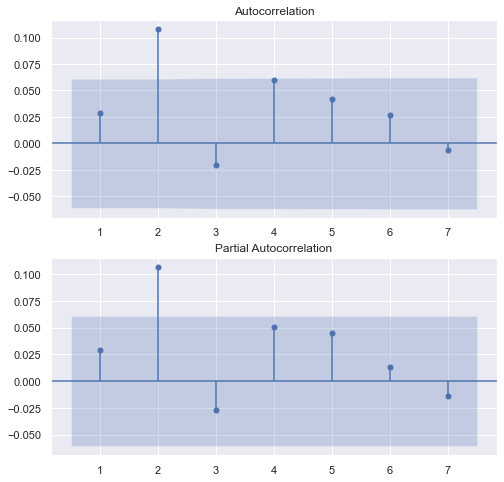

In [43]:
# Plot ACF and PACF for CIN 1st_downs

plot_corr_func(team_stats_weekly_grouped['first_downs_home'])

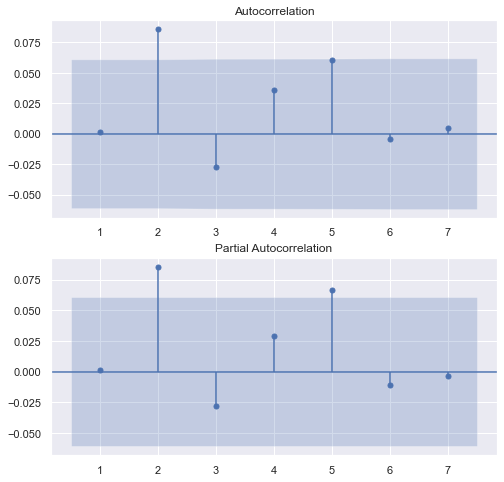

In [44]:
# Plot ACF and PACF for 'Total_yards'

plot_corr_func(team_stats_weekly_grouped['total_yards_home'])

In [45]:
# Save the data frames as '.csv' files

team_stats.to_csv('../data/processed/SuperBowl_EDA.csv',index=False)

home_stats_mean.to_csv("../data/processed/Home_SuperBowl_EDA.csv", index=False)
away_stats_mean.to_csv("../data/processed/Away_SuperBowl_EDA.csv", index=False)